In [44]:
import json
import re

file_path = "C:/Users/simon/OneDrive/Desktop/Advanced Machine Learning/NLP/Group_project/train-v2.0.json"
with open(file_path, 'r') as file:
    data = json.load(file)
    text_data = data["data"]
    paragraphs = [paragraph["context"] for topic in text_data for paragraph in topic["paragraphs"]]
    
    # Extract questions and answers, handling cases where "answers" list is empty
    questions = []
    answers = []
    for topic in text_data:
        for paragraph in topic["paragraphs"]:
            for question in paragraph["qas"]:
                # Check if "answers" list is not empty before accessing its elements
                if question["answers"]:
                    questions.append(question["question"])
                    answers.append(question["answers"][0]["text"])
                else:
                    # Handle the case where "answers" list is empty
                    questions.append(question["question"])
                    answers.append("No answer available")


In [45]:
#remove spaces
paragraphs = [re.sub('\n', ' ', doc) for doc in paragraphs]
questions = [re.sub('\n', ' ', question) for question in questions]
answers = [re.sub('\n', ' ', answer) for answer in answers]
#remove email(probably not useful)
paragraphs = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', doc) for doc in paragraphs]
questions = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', question) for question in questions]
answers = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', answer) for answer in answers]
# split sentences
sentences_par = [re.split('[?!.]\s', doc) for doc in paragraphs]
sentences_que = [re.split('[?!.]\s', question) for question in questions]
sentences_ans = [re.split('[?!.]\s', answer) for answer in answers]

print("Paragraphs:\n", paragraphs[:3])
print("\nQuestions:\n", questions[:3])
print("\nAnswers:\n", answers[:3])

Paragraphs:
 ['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar". Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and

In [46]:
from pandas.core.common import flatten
#flatten the structure to 3 big array of phrase
sentences_par = list(flatten(sentences_par))
sentences_que= list(flatten(sentences_que))
sentences_ans = list(flatten(sentences_ans))

sentences_par[:5]
sentences_ans[:5]
sentences_que[:5]

['When did Beyonce start becoming popular?',
 'What areas did Beyonce compete in when she was growing up?',
 "When did Beyonce leave Destiny's Child and become a solo singer?",
 'In what city and state did Beyonce  grow up',
 '']

In [47]:
#Data cleaning
tokenized_sentences_par = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences_par]
tokenized_sentences_que = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences_que]
tokenized_sentences_ans = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences_ans]
# remove sentences that are only 1 word long
tokenized_sentences_par = [sentence for sentence in tokenized_sentences_par if len(sentence) > 1]
tokenized_sentences_que = [sentence for sentence in tokenized_sentences_que if len(sentence) > 1]
tokenized_sentences_ans = [sentence for sentence in tokenized_sentences_ans if len(sentence) > 1]

#Not sure if it is right or not (sentences all togheter)
all_tokenized_sentences = tokenized_sentences_par + tokenized_sentences_que +tokenized_sentences_ans
for sentence in all_tokenized_sentences[:10]:
    print(sentence)

['beyoncé', 'giselle', 'knowles', 'carter', 'biːˈjɒnseɪ', 'bee', 'yon', 'say', 'born', 'september', '4', '1981', 'is', 'an', 'american', 'singer', 'songwriter', 'record', 'producer', 'and', 'actress']
['born', 'and', 'raised', 'in', 'houston', 'texas', 'she', 'performed', 'in', 'various', 'singing', 'and', 'dancing', 'competitions', 'as', 'a', 'child', 'and', 'rose', 'to', 'fame', 'in', 'the', 'late', '1990s', 'as', 'lead', 'singer', 'of', 'r', 'b', 'girl', 'group', 'destiny', 's', 'child']
['managed', 'by', 'her', 'father', 'mathew', 'knowles', 'the', 'group', 'became', 'one', 'of', 'the', 'world', 's', 'best', 'selling', 'girl', 'groups', 'of', 'all', 'time']
['their', 'hiatus', 'saw', 'the', 'release', 'of', 'beyoncé', 's', 'debut', 'album', 'dangerously', 'in', 'love', '2003', 'which', 'established', 'her', 'as', 'a', 'solo', 'artist', 'worldwide', 'earned', 'five', 'grammy', 'awards', 'and', 'featured', 'the', 'billboard', 'hot', '100', 'number', 'one', 'singles', 'crazy', 'in', '

In [48]:
all_words = [word for sentence in all_tokenized_sentences for word in sentence]


# Create a set to get unique words
unique_words = set(all_words)

# Get the length of the vocabulary
vocab_length = len(unique_words)

# Print the length of the vocabulary
print("Vocabulary Length:", vocab_length)
print(all_words[:100])

Vocabulary Length: 84893
['beyoncé', 'giselle', 'knowles', 'carter', 'biːˈjɒnseɪ', 'bee', 'yon', 'say', 'born', 'september', '4', '1981', 'is', 'an', 'american', 'singer', 'songwriter', 'record', 'producer', 'and', 'actress', 'born', 'and', 'raised', 'in', 'houston', 'texas', 'she', 'performed', 'in', 'various', 'singing', 'and', 'dancing', 'competitions', 'as', 'a', 'child', 'and', 'rose', 'to', 'fame', 'in', 'the', 'late', '1990s', 'as', 'lead', 'singer', 'of', 'r', 'b', 'girl', 'group', 'destiny', 's', 'child', 'managed', 'by', 'her', 'father', 'mathew', 'knowles', 'the', 'group', 'became', 'one', 'of', 'the', 'world', 's', 'best', 'selling', 'girl', 'groups', 'of', 'all', 'time', 'their', 'hiatus', 'saw', 'the', 'release', 'of', 'beyoncé', 's', 'debut', 'album', 'dangerously', 'in', 'love', '2003', 'which', 'established', 'her', 'as', 'a', 'solo', 'artist', 'worldwide']


Text(0, 0.5, 'Frequency')

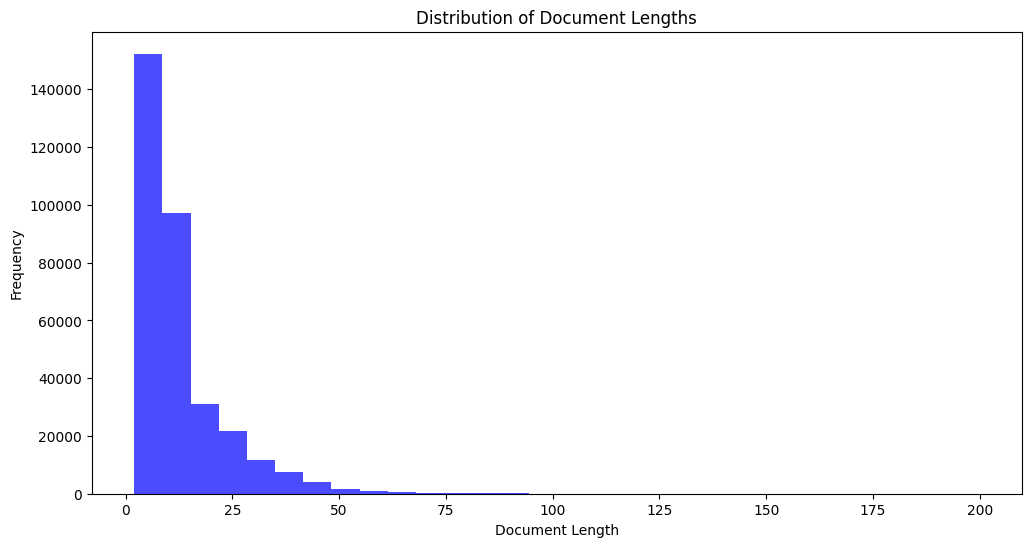

In [49]:
import matplotlib.pyplot as plt

# Document lengths
document_lengths_par = [len(sentence) for sentence in tokenized_sentences_par]
document_lengths_que = [len(sentence) for sentence in tokenized_sentences_que]
document_lengths_ans = [len(sentence) for sentence in tokenized_sentences_ans]

# Combine all document lengths into a single list
all_document_lengths = document_lengths_par + document_lengths_que + document_lengths_ans

# Plot histograms
plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
plt.hist(all_document_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')




### Embedding


In [50]:
from gensim.models.word2vec import Word2Vec
#parameter equal to the class exampale no really a choice
model_par = Word2Vec(tokenized_sentences_par, vector_size=30, min_count=5, window=10)
model_que = Word2Vec(tokenized_sentences_que, vector_size=30, min_count=5, window=10)
model_ans = Word2Vec(tokenized_sentences_ans, vector_size=30, min_count=5, window=10)

#embedding for the full model
model_all = Word2Vec(all_tokenized_sentences,vector_size=30,min_count=5,window=10)

In [51]:
#vocabolary used by Word2Vec:
print(len(model_par.wv))
print(len(model_que.wv))
print(len(model_ans.wv))
print("Full model \n",len(model_all.wv))

23368
13829
6987
Full model 
 30852


In [52]:
#random tests
term = 'beyonce'
model_all.wv.most_similar(term)

[('beyoncé', 0.9600003361701965),
 ('madonna', 0.8890235424041748),
 ('spielberg', 0.8684608936309814),
 ('destiny', 0.8523126244544983),
 ('kanye', 0.8362398147583008),
 ('frédéric', 0.8271802663803101),
 ('solo', 0.808822512626648),
 ('lee', 0.8002068400382996),
 ('spectre', 0.7930472493171692),
 ('jay', 0.7910757064819336)]

Visualitation

In [53]:
import random

sample = random.sample(list(model_all.wv.key_to_index), 500)
word_vectors = model_all.wv[sample]
word_vectors

array([[-1.9376743 ,  0.7917213 , -0.19664666, ...,  0.6438831 ,
         0.42724434,  1.7283078 ],
       [ 0.03241621, -0.16885808,  0.22331363, ...,  0.15297389,
        -0.10847785, -0.0413839 ],
       [ 0.11418184,  0.13220303, -0.08734821, ...,  0.09598716,
        -0.2082948 , -0.24346092],
       ...,
       [-0.08839546,  0.07556573,  0.3543638 , ...,  0.21268088,
        -0.13115779, -0.21433584],
       [ 0.3300284 ,  0.03288621,  0.65967643, ...,  0.19404438,
        -0.1997064 , -0.2888279 ],
       [-0.00942367, -0.06469376,  0.08609605, ...,  0.14654107,
        -0.21067578, -0.09083981]], dtype=float32)

In [54]:

from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px

tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors);


In [55]:
x, y, z = np.transpose(tsne_embedding)
fig = px.scatter_3d(x=x[:200],y=y[:200],z=z[:200],text=sample[:200])
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

In [56]:
from sentence_transformers import SentenceTransformer, CrossEncoder

semb_model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
xenc_model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

In [57]:
import os
import pickle

# Define hnswlib index path
embeddings_cache_path = './qa_embeddings_cache.pkl'

# Load cache if available
if os.path.exists(embeddings_cache_path):
    print('Loading embeddings cache')
    with open(embeddings_cache_path, 'rb') as f:
        corpus_embeddings = pickle.load(f)
# Else compute embeddings
else:
    print('Computing embeddings')
    corpus_embeddings = semb_model.encode(paragraphs, convert_to_tensor=True, show_progress_bar=True)
    # Save the index to a file for future loading
    print(f'Saving index to: \'{embeddings_cache_path}\'')
    with open(embeddings_cache_path, 'wb') as f:
        pickle.dump(corpus_embeddings, f)

Loading embeddings cache


In [58]:
import os
import hnswlib
import time
start = time.time()
# Create empthy index
index = hnswlib.Index(space='cosine', dim=corpus_embeddings.size(1))

# Define hnswlib index path
index_path = './qa_hnswlib_100.index'

# Load index if available
if os.path.exists(index_path):
    print('Loading index...')
    index.load_index(index_path)
# Else index data collection
else:
    # Initialise the index
    print('Start creating HNSWLIB index')
    index.init_index(max_elements=corpus_embeddings.size(0), ef_construction=100, M=64) # see https://github.com/nmslib/hnswlib/blob/master/ALGO_PARAMS.md for parameter description
    # Compute the HNSWLIB index (it may take a while)
    index.add_items(corpus_embeddings.cpu(), list(range(len(corpus_embeddings))))
    # Save the index to a file for future loading
    print(f'Saving index to: {index_path}')
    index.save_index(index_path)

end = time.time()
print(f"Exectution time: {int((end - start) / 60)}:{int((end - start) % 60)} min:sec")

Loading index...
Exectution time: 0:0 min:sec


In [59]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto", torch_dtype=torch.float32)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [60]:


input_text = 'Translate the following sentence from Italian to English: "Amo la pizza"'
input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)

output_ids = model.generate(input_ids, max_new_tokens=32)
output_text = tokenizer.decode(output_ids[0])
print(output_text)




<pad> "I love pizza"</s>


In [61]:
def qa_pipeline(
    question, print_flag,
    similarity_model=semb_model,
    embeddings_index=index,
    re_ranking_model=xenc_model,
    generative_model=model,
    device=device
):
    if not question.endswith('?'):
        question = question + '?'
    # Embed question
    question_embedding = similarity_model.encode(question, convert_to_tensor=True)
    # Search documents similar to question in index
    corpus_ids, distances = embeddings_index.knn_query(question_embedding.cpu(), k=64)
    # Re-rank results
    xenc_model_inputs = [(question, paragraphs[idx]) for idx in corpus_ids[0]]
    cross_scores = re_ranking_model.predict(xenc_model_inputs)
    # Get best matching passage
    passage_idx = np.argsort(-cross_scores)[0]
    passage = paragraphs[corpus_ids[0][passage_idx]]
    # Encode input
    input_text = f"Given the following passage, answer the related question.\n\nPassage:\n\n{passage}\n\nQ: {question}"
    if print_flag:
        print('INPUT TEXT:', input_text, "\n")
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
    # Generate output
    output_ids = generative_model.generate(input_ids, max_new_tokens=512)
    # Decode output
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    # Return result
    return output_text

In [62]:
question = input("Ask a question >>> ")  # e.g., "How many fingers in a hand?", "What is the oldest newspaper in Chile?", ...
print()

print(qa_pipeline(question, True))


INPUT TEXT: Given the following passage, answer the related question.

Passage:

Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".

Q: Beyoncè born when? 

September 4, 1981


## Text to Speech- Speech to text

In [63]:
!pip install numpy scipy librosa unidecode inflect openai-whisper

It's been 3 days with the same problem, I have no idea how to solve it, I also tried to copy your code Joona I'm sorry <3

In [75]:
import torch
from scipy.io.wavfile import write
import whisper

device = torch.device('cpu')

# Load tacotron
tacotron2 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

# Load waveglow
waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

# Load utils
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tts_utils')



Using cache found in C:\Users\simon/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
text = "When did Beyoncé release Dangerously in Love?"

audio_numpy, rate = text2speech(text)

write("audio.wav", rate, audio_numpy)
Audio(audio_numpy, rate=rate) 